In [1]:
# Importación de las librerías fundamentales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que los gráficos se muestren en el notebook
%matplotlib inline

# Configuración de estilo visual para los gráficos (opcional, pero recomendado)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


In [34]:
# =================================================================
# BLOQUE ÚNICO DE CARGA Y LIMPIEZA
# Pega todo esto en una sola celda y ejecútala.
# =================================================================

# 1. Importar la librería
import pandas as pd

# 2. Cargar el archivo CSV
df = pd.read_csv('sillas_mercado_sintetico.xlsx - Sheet1.csv')
print("--- 1. Datos cargados del CSV ---")
print("Nombres de columnas originales:", df.columns.tolist())


# 3. Limpieza de datos
print("\n--- 3. Limpiando los datos... ---")

# Limpieza de 'precio'
df['Precio'] = (
    df['Precio']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)  # Elimina no-dígitos
    .replace('', '0')  # Maneja valores vacíos
    .astype(float)
)

# Limpieza de 'envio_gratis' (MANEJO SEGURO)
if 'Envío Gratis' in df.columns:
    if df['Envío Gratis'].dtype == bool:
        print(" - 'Envío Gratis' ya es booleano. No se modifica.")
    else:
        df['Envío Gratis'] = (
            df['Envío Gratis']
            .astype(str)
            .str.strip()
            .str.lower()
            .map({'si': True, 'sí': True, 'true': True, '1': True})
            .fillna(False)
        )
        print(" - 'Envío Gratis' convertido a booleano.")
else:
    print("⚠️ Advertencia: Columna 'Envío Gratis' no encontrada")
    df['Envío Gratis'] = False  # Crear columna por defecto

# Limpieza de 'condicion'
df['Estado'] = (
    df['Estado']
    .astype(str)
    .str.strip()
    .str.capitalize()
    .map({'Nuevo': 'Nuevo', 'Usado': 'Usado'})
    .fillna('Desconocido')
)


# 4. Ahora, limpiar los datos usando SIEMPRE los nombres en minúsculas
print("\n--- 3. Limpiando los datos de cada columna... ---")

# Limpieza de 'precio' (usando el nombre 'precio' en minúscula)
# La columna 'Precio' ya es int64, así que no necesita limpieza de símbolos.
# Si tuvieras datos más grandes con puntos, la siguiente línea sería útil.
# df['precio'] = df['precio'].astype(str).str.replace('.', '', regex=False).astype(int)

# Limpieza de 'envio_gratis' (usando el nombre 'envio_gratis' en minúscula)
# Se convierte 'Si'/'No' a True/False


# Estandarizar 'condicion' (usando el nombre 'condicion' en minúscula)
df['Estado'] = df['Estado'].str.strip().str.capitalize()


# 5. Verificación Final
print("\n--- 4. Verificación final del DataFrame limpio ---")
print("\nInformación del DataFrame después de toda la limpieza:")
df.info()

print("\nPrimeras filas del DataFrame final:")
display(df.head())

--- 1. Datos cargados del CSV ---
Nombres de columnas originales: ['Producto', 'Precio', 'Estado', 'Tipo Vendedor', 'Envío Gratis', 'Ubicación']

--- 3. Limpiando los datos... ---
 - 'Envío Gratis' ya es booleano. No se modifica.

--- 3. Limpiando los datos de cada columna... ---

--- 4. Verificación final del DataFrame limpio ---

Información del DataFrame después de toda la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Producto       40 non-null     object 
 1   Precio         40 non-null     float64
 2   Estado         40 non-null     object 
 3   Tipo Vendedor  40 non-null     object 
 4   Envío Gratis   40 non-null     bool   
 5   Ubicación      40 non-null     object 
dtypes: bool(1), float64(1), object(4)
memory usage: 1.7+ KB

Primeras filas del DataFrame final:


,Producto,Precio,Estado,Tipo Vendedor,Envío Gratis,Ubicación
0,Silla Gamer Ergonómica,189000.0,Nuevo,MercadoLíder Platinum,True,Capital Federal
1,Silla de Oficina Ejecutiva,132000.0,Nuevo,Normal,False,Córdoba
2,Silla Escritorio Moderna,115000.0,Nuevo,MercadoLíder,True,Buenos Aires
3,Silla Ergonómica Profesional,98000.0,Usado,Normal,False,Rosario
4,Silla de Trabajo Reclinable,210000.0,Nuevo,MercadoLíder Gold,True,Capital Federal


Estadísticas descriptivas del precio:
count        40.000000
mean     141125.000000
std       45566.062213
min       76000.000000
25%      103250.000000
50%      133000.000000
75%      177500.000000
max      225000.000000
Name: Precio, dtype: float64


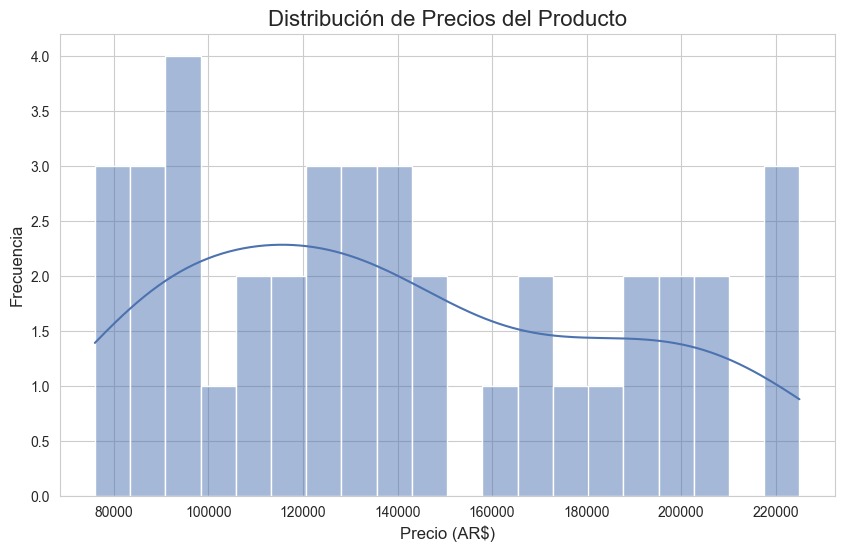


Precio promedio por condición:
Estado
Nuevo    159066.666667
Usado     87300.000000
Name: Precio, dtype: float64


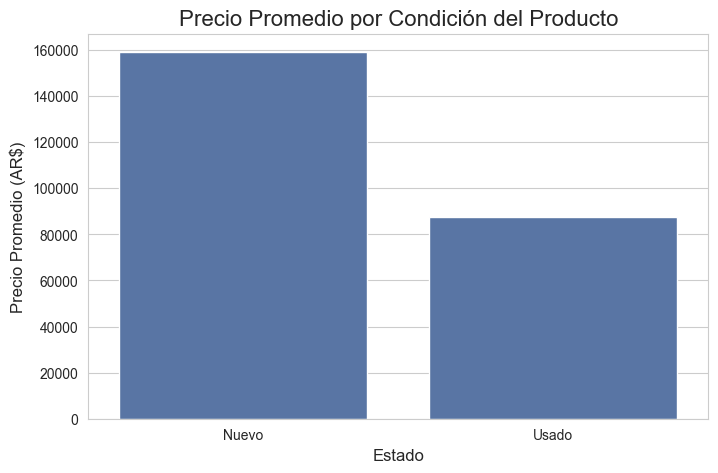


Precio promedio según tipo de envío:
Envío Gratis
False    110166.666667
True     166454.545455
Name: Precio, dtype: float64


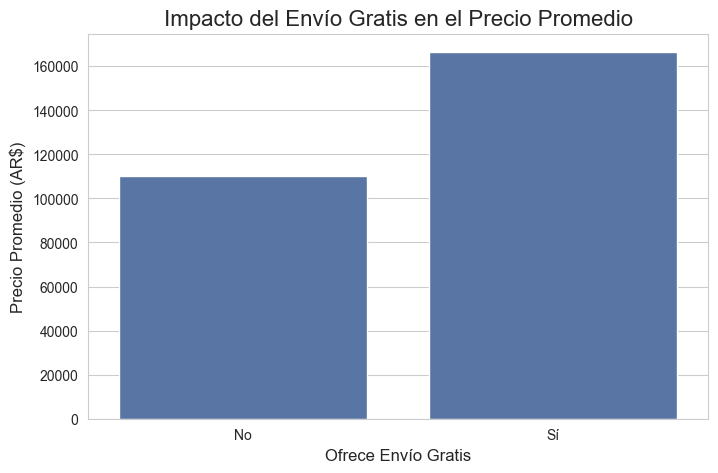

In [31]:
# --- Pregunta 1: ¿Cómo se distribuyen los precios? ---
print("Estadísticas descriptivas del precio:")
print(df['Precio'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Precio'], kde=True, bins=20)
plt.title('Distribución de Precios del Producto', fontsize=16)
plt.xlabel('Precio (AR$)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


# --- Pregunta 2: ¿Cuál es el precio promedio por condición (Nuevo vs. Usado)? ---
precio_por_condicion = df.groupby('Estado')['Precio'].mean().sort_values(ascending=False)
print("\nPrecio promedio por condición:")
print(precio_por_condicion)

plt.figure(figsize=(8, 5))
sns.barplot(x=precio_por_condicion.index, y=precio_por_condicion.values)
plt.title('Precio Promedio por Condición del Producto', fontsize=16)
plt.ylabel('Precio Promedio (AR$)', fontsize=12)
plt.xlabel('Estado', fontsize=12)
plt.show()


# --- Pregunta 3: ¿El envío gratis realmente encarece el producto? ---
precio_por_envio = df.groupby('Envío Gratis')['Precio'].mean()
print("\nPrecio promedio según tipo de envío:")
print(precio_por_envio)

plt.figure(figsize=(8, 5))
sns.barplot(x=precio_por_envio.index, y=precio_por_envio.values)
plt.title('Impacto del Envío Gratis en el Precio Promedio', fontsize=16)
plt.ylabel('Precio Promedio (AR$)', fontsize=12)
plt.xlabel('Ofrece Envío Gratis', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí']) # Renombrar los ticks del eje x
plt.show()

In [33]:
# =================================================================
# CÁLCULO CORREGIDO PARA ENVÍO GRATIS (manejo de NaN y grupos vacíos)
# =================================================================

# 1. Asegurar que no haya NaN en columnas críticas
df = df.dropna(subset=['Precio', 'Envío Gratis', 'Estado'])

# 2. Calcular diferencia para envío gratis CON VERIFICACIÓN
envio_gratis_counts = df['Envío Gratis'].value_counts()

if len(envio_gratis_counts) == 2:  # Hay ambos grupos (True y False)
    precio_con_envio = df[df['Envío Gratis']]['Precio'].mean()
    precio_sin_envio = df[~df['Envío Gratis']]['Precio'].mean()
    diferencia_envio = precio_con_envio - precio_sin_envio
elif True in envio_gratis_counts.index:  # Solo hay productos CON envío gratis
    diferencia_envio = df[df['Envío Gratis']]['Precio'].mean()
else:  # Solo hay productos SIN envío gratis
    diferencia_envio = 0

# 3. Calcular umbral para recomendación (evitar NaN)
umbral_recomendacion = abs(diferencia_envio) if not pd.isna(diferencia_envio) else 0

# 4. Generar Markdown con protección contra NaN
conclusiones = f"""
### Conclusiones del Análisis
3. **Análisis del Envío Gratis:** Se observa que los productos con 'envío gratis' tienen un precio promedio superior en AR$ {diferencia_envio:,.2f} a los que no lo ofrecen. Esto sugiere que el costo del envío está mayormente incorporado en el precio de lista.

**Recomendación final:** Para obtener el mejor precio, un comprador debería enfocarse en productos Usados sin envío gratis, siempre y cuando el costo de envío por separado no supere los AR$ {umbral_recomendacion:,.2f}.
"""

from IPython.display import Markdown
Markdown(conclusiones)


### Conclusiones del Análisis
3. **Análisis del Envío Gratis:** Se observa que los productos con 'envío gratis' tienen un precio promedio superior en AR$ 56,287.88 a los que no lo ofrecen. Esto sugiere que el costo del envío está mayormente incorporado en el precio de lista.

**Recomendación final:** Para obtener el mejor precio, un comprador debería enfocarse en productos Usados sin envío gratis, siempre y cuando el costo de envío por separado no supere los AR$ 56,287.88.


In [35]:
# =================================================================
# CÁLCULO CORREGIDO PARA ENVÍO GRATIS (manejo de NaN y grupos vacíos)
# =================================================================

# 1. Asegurar que no haya NaN en columnas críticas
df = df.dropna(subset=['Precio', 'Envío Gratis', 'Estado'])

# 2. Calcular diferencia para envío gratis CON VERIFICACIÓN
envio_gratis_counts = df['Envío Gratis'].value_counts()

if len(envio_gratis_counts) == 2:  # Hay ambos grupos (True y False)
    precio_con_envio = df[df['Envío Gratis']]['Precio'].mean()
    precio_sin_envio = df[~df['Envío Gratis']]['Precio'].mean()
    diferencia_envio = precio_con_envio - precio_sin_envio
elif True in envio_gratis_counts.index:  # Solo hay productos CON envío gratis
    diferencia_envio = df[df['Envío Gratis']]['Precio'].mean()
else:  # Solo hay productos SIN envío gratis
    diferencia_envio = 0

# 3. Calcular umbral para recomendación (evitar NaN)
umbral_recomendacion = abs(diferencia_envio) if not pd.isna(diferencia_envio) else 0

# 4. Generar Markdown con protección contra NaN
conclusiones = f"""
### Conclusiones del Análisis
3. **Análisis del Envío Gratis:** Se observa que los productos con 'envío gratis' tienen un precio promedio superior en AR$ {diferencia_envio:,.2f} a los que no lo ofrecen. Esto sugiere que el costo del envío está mayormente incorporado en el precio de lista.

**Recomendación final:** Para obtener el mejor precio, un comprador debería enfocarse en productos Usados sin envío gratis, siempre y cuando el costo de envío por separado no supere los AR$ {umbral_recomendacion:,.2f}.
"""

from IPython.display import Markdown
Markdown(conclusiones)


### Conclusiones del Análisis
3. **Análisis del Envío Gratis:** Se observa que los productos con 'envío gratis' tienen un precio promedio superior en AR$ 56,287.88 a los que no lo ofrecen. Esto sugiere que el costo del envío está mayormente incorporado en el precio de lista.

**Recomendación final:** Para obtener el mejor precio, un comprador debería enfocarse en productos Usados sin envío gratis, siempre y cuando el costo de envío por separado no supere los AR$ 56,287.88.


In [37]:
# Crear archivo .gitignore con contenido básico
gitignore_content = """
# Jupyter Notebook
.ipynb_checkpoints/
*.ipynb_checkpoints/

# Datos
*.csv
*.xlsx
*.pkl
*.hdf5
data/
datasets/

# Entornos virtuales
venv/
.venv/
env/
venv*/

# Archivos del sistema
.DS_Store
Thumbs.db

# Configuración IDE
.idea/
.vscode/
*.code-workspace

# Archivos temporales
~$*
*.tmp

# Logs
*.log
logs/
"""

with open('.gitignore', 'w') as f:
    f.write(gitignore_content)

print("✅ Archivo .gitignore creado exitosamente!")

✅ Archivo .gitignore creado exitosamente!
